# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [149]:
#Dependencies
import requests
import json
from api_keys import api_key
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import random
from citipy import citipy
import scipy.stats as st



In [150]:
#Urls and API Keys
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="
#query_url = url + "appid=" + api_key + "&q={name}"
query_url = url + "appid=" + api_key + "&q=houston" + "&units=imperial"

In [151]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
    
#print(query_url)
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1599937539,
 'id': 4699066,
 'main': {'feels_like': 92.48,
          'humidity': 52,
          'pressure': 1013,
          'temp': 91.38,
          'temp_max': 93.99,
          'temp_min': 90},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4404,
         'sunrise': 1599912293,
         'sunset': 1599957026,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 360, 'speed': 12.75}}


## Generate Cities List

In [152]:
#generating coordinates
coordinates = [(random.random()*70.0, random.random()*70.0) for _ in range(10)]
#coord_df = pd.DataFrame(coordinates)
#coordinates_df= coord_df.rename(columns={"0":"Latitude", "1":"Longitude"})
#coordinates_df
print(coordinates)

[(66.92216251616944, 44.69056506711113), (53.71525039007707, 39.58273862297108), (0.1743829603668745, 9.706866168115786), (14.840496544761594, 6.511839161557173), (18.00248145311031, 30.30524754539465), (33.43933228604412, 16.997503870172032), (48.718475309646024, 12.80088943841933), (22.175607155159618, 49.27540921458385), (27.914371038703436, 64.75261067494147), (63.02042915860623, 64.02778672578438)]


In [153]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon).city_name)
print(cities)


['mezen', 'zarechnyy', 'ntoum', 'dakoro', 'marawi', 'misratah', 'plattling', 'abu samrah', 'kharan', 'igrim']


In [154]:
#All individual variables are reading the json response ap
#pressure = []
#lon = []
#lat = []
#cloud = []
#wind = []
#temp = []

#for city in cities:
    #response = requests.get(query_url + city).json()
response = weather_json
temp = response['main']['temp']
humidity = response['main']['humidity']
cloud = response['clouds']['all']
wind = response['wind']['speed']
print(cloud)
    #country_code = city.country_code
    #name = city.city_name
    #lon = lon.append(response['coord']['lon'])
    #lat = lat.append(response['coord']['lat'])
    #humidity = pressure.append(response['main']['humidity'])
    #cloud = cloudiness.append(response['clouds']['all'])
    
    #print(f"The country code of {name} is '{country_code}'.")

40


In [155]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key +  "&units=imperial" +"&q="
lon = []
lat = []
cloud = []
wind = []
temp = []
humidity =[]
max_temp = []
country = []
date = []
name = []
count_sets = 1
cities_count = 0
for city in cities:
    #country_code = city.country_code
   
        
    #count_sets = (count_sets(cities_counts = 50)+1)
    request_url = query_url + city
    #print(cities_count)
   
    try:
        response = requests.get(request_url).json()
        if cities_count <= 50:
            cities_count = cities_count + 1
        else: 
            cities_count = 0
            count_sets = count_sets + 1
    #print(f"The country code of {name} is '{country_code}'.")
    #weather_response = requests.get(query_url)
    #weather_json = weather_response.json()
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        max_temp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(city)
        print(f"Processing Record ", cities_count , " of set " , count_sets, " | ", city)
    except KeyError:
        print("City not found. Skipping...")  
        #print("removing " + {city.name})
        cities.remove(city)
#rint(cities)
#rint(lat)
#ToDos - Fix the F String to print out the desired results. 
#

Processing Record  1  of set  1  |  mezen
Processing Record  2  of set  1  |  zarechnyy
Processing Record  3  of set  1  |  ntoum
Processing Record  4  of set  1  |  dakoro
Processing Record  5  of set  1  |  marawi
Processing Record  6  of set  1  |  misratah
Processing Record  7  of set  1  |  plattling
Processing Record  8  of set  1  |  abu samrah
Processing Record  9  of set  1  |  kharan
Processing Record  10  of set  1  |  igrim


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [156]:
weather_data = {"City": name, "Lat": lat, "Lng": lon, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_data)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mezen,65.85,44.24,44.42,93,13,7.18,RU,1599937749
1,zarechnyy,53.20,45.19,57.99,46,0,1.86,RU,1599937749
2,ntoum,0.38,9.78,78.80,88,40,9.17,GA,1599937749
3,dakoro,14.51,6.76,97.39,24,68,3.87,NE,1599937749
4,marawi,8.00,124.29,73.99,93,100,5.01,PH,1599937750
5,misratah,32.38,15.09,81.00,75,0,16.87,LY,1599937750
6,plattling,48.78,12.87,68.00,72,0,1.16,DE,1599937750
7,abu samrah,35.30,37.18,80.06,39,0,8.41,SY,1599937751
8,kharan,28.58,65.42,82.33,15,0,0.81,PK,1599937689
9,igrim,63.19,64.42,47.30,92,21,6.35,RU,1599937751


In [157]:
#Weather Stats
weather_stats = weather_data.describe()
weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,1.000000e+01
mean,35.017000,42.524000,71.128000,63.700000,24.200000,6.06900,1.599938e+09
std,22.762248,36.072717,16.742983,30.140596,34.924681,4.81317,1.923567e+01
min,0.380000,6.760000,44.420000,15.000000,0.000000,0.81000,1.599938e+09
25%,18.027500,13.425000,60.492500,40.750000,0.000000,2.36250,1.599938e+09
50%,33.840000,40.710000,76.395000,73.500000,6.500000,5.68000,1.599938e+09
75%,52.095000,59.612500,80.765000,91.000000,35.250000,8.10250,1.599938e+09
max,65.850000,124.290000,97.390000,93.000000,100.000000,16.87000,1.599938e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [158]:
    low_humidity = weather_stats.iloc[7]['Humidity']
    low_humidity
    if low_humidity < 100:
        print("All cities under 100% humidity")
        clean_data_df = weather_data
    else:
        #TODO remove cities that have humidity value greather than 100
        print("One or more cities greater than 100% humidity")
        clean_data_df =weather_data

clean_data_df
    #humidity_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]


All cities under 100% humidity


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mezen,65.85,44.24,44.42,93,13,7.18,RU,1599937749
1,zarechnyy,53.20,45.19,57.99,46,0,1.86,RU,1599937749
2,ntoum,0.38,9.78,78.80,88,40,9.17,GA,1599937749
3,dakoro,14.51,6.76,97.39,24,68,3.87,NE,1599937749
4,marawi,8.00,124.29,73.99,93,100,5.01,PH,1599937750
5,misratah,32.38,15.09,81.00,75,0,16.87,LY,1599937750
6,plattling,48.78,12.87,68.00,72,0,1.16,DE,1599937750
7,abu samrah,35.30,37.18,80.06,39,0,8.41,SY,1599937751
8,kharan,28.58,65.42,82.33,15,0,0.81,PK,1599937689
9,igrim,63.19,64.42,47.30,92,21,6.35,RU,1599937751


In [159]:
#  Get the indices of cities that have humidity over 100%.


In [160]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

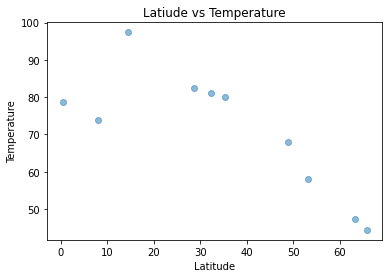

In [161]:
plt.title("Latiude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.scatter(clean_data_df["Lat"], clean_data_df["Max Temp"], alpha = 0.5)

## Latitude vs. Humidity Plot

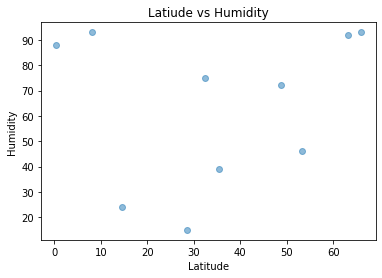

In [162]:
plt.title("Latiude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(clean_data_df["Lat"], clean_data_df["Humidity"], alpha = 0.5)

## Latitude vs. Cloudiness Plot

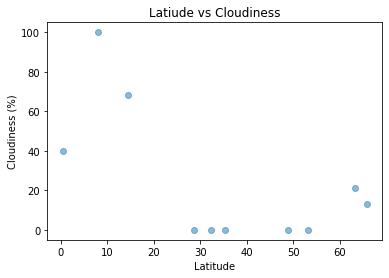

In [163]:
plt.title("Latiude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(clean_data_df["Lat"], clean_data_df["Cloudiness"], alpha = 0.5)

## Latitude vs. Wind Speed Plot

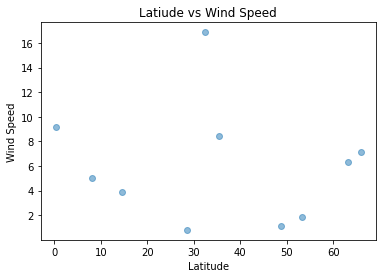

In [164]:
plt.title("Latiude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(clean_data_df["Lat"], clean_data_df["Wind Speed"], alpha = 0.5)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [165]:
#Northern Hemisphere Calculations
northern_hemisphere_df = clean_data_df[clean_data_df['Lat'] > 0] 
northern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mezen,65.85,44.24,44.42,93,13,7.18,RU,1599937749
1,zarechnyy,53.20,45.19,57.99,46,0,1.86,RU,1599937749
2,ntoum,0.38,9.78,78.80,88,40,9.17,GA,1599937749
3,dakoro,14.51,6.76,97.39,24,68,3.87,NE,1599937749
4,marawi,8.00,124.29,73.99,93,100,5.01,PH,1599937750
5,misratah,32.38,15.09,81.00,75,0,16.87,LY,1599937750
6,plattling,48.78,12.87,68.00,72,0,1.16,DE,1599937750
7,abu samrah,35.30,37.18,80.06,39,0,8.41,SY,1599937751
8,kharan,28.58,65.42,82.33,15,0,0.81,PK,1599937689
9,igrim,63.19,64.42,47.30,92,21,6.35,RU,1599937751


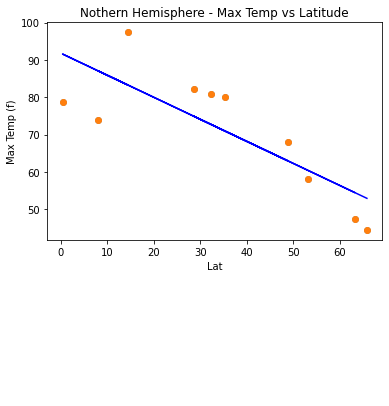

In [175]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Max Temp"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Max Temp"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Max Temp vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Max Temp (f)')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [176]:
#Southern Hemisphere - 
southern_hemisphere_df = clean_data_df[clean_data_df['Lat'] < 0] 
southern_hemisphere_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


ValueError: Inputs must not be empty.

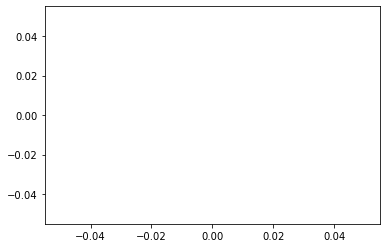

In [177]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Max Temp"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Max Temp"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Max Temp (f)')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

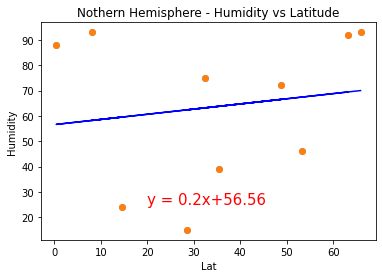

In [179]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Humidity"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Humidity"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Humidity vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Humidity"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Humidity"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

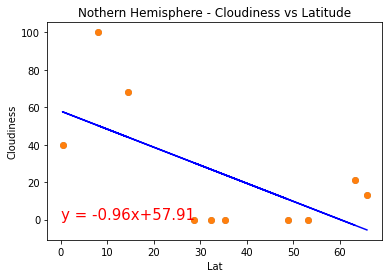

In [169]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Cloudiness"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Cloudiness"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Cloudiness vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Cloudiness"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Cloudiness"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

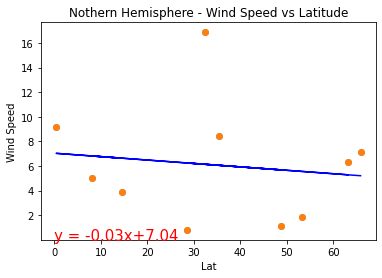

In [174]:
plt.scatter(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Wind Speed"])
regress_values = (northern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(northern_hemisphere_df["Lat"],northern_hemisphere_df ["Wind Speed"])
plt.plot(northern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Nothern Hemisphere - Wind Speed vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
plt.scatter(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Wind Speed"])
regress_values = (southern_hemisphere_df["Lat"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
plt.scatter(southern_hemisphere_df["Lat"],southern_hemisphere_df ["Wind Speed"])
plt.plot(southern_hemisphere_df["Lat"],regress_values,"b-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed vs Latitude")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.show()